# **1. Introduction**

- **Objective:** To predict whether patient will have liver diease or not.
- **Dataset:** This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India.

# **2. Importing Neccessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer,MinMaxScaler,RobustScaler,MaxAbsScaler,QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from tqdm import tqdm

# **3. Data Processing**

### **3.1 Importing & validating the data from csv file**

In [ ]:
data = pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin&Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
data.info(),data.describe(),data.describe(include='O')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphate          583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin&Globulin_Ratio      579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


(None,
               Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphate  \
 count  583.000000       583.000000        583.000000          583.000000   
 mean    44.746141         3.298799          1.486106          290.576329   
 std     16.189833         6.209522          2.808498          242.937989   
 min      4.000000         0.400000          0.100000           63.000000   
 25%     33.000000         0.800000          0.200000          175.500000   
 50%     45.000000         1.000000          0.300000          208.000000   
 75%     58.000000         2.600000          1.300000          298.000000   
 max     90.000000        75.000000         19.700000         2110.000000   
 
        Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
 count                583.000000                  583.000000      583.000000   
 mean                  80.713551                  109.910806        6.483190   
 std                  182.620356                  288.9185

# **3.2 Inference**
- Total 11 columns with 10 predictors & 1 Target variables
- 4 Null values present in Albumin&Globulin_Ratio

# **3.3 EDA**

###  **3.3.1 Age**
- Age column has no null & zero values.
- Min Age is 4 years and max is 90 years

###  **3.3.2 Gender**
- It has 2 unique (male/Female) values.
- Column type is categorical value.
- One hot encoding can be used to covert into numerical value

###  **3.3.3 Total Bilirubin**
- Bilirubin is a byproduct of broken-down old red blood cells.
- When red blood cells finish their life cycles in your body, they break down and pass through our bloodstream to our liver for processing.
- Our liver sorts bilirubin with other waste products into a fluid called bile. Bile exits our body through intestines.
- A bilirubin test measures bilirubin levels in blood.
### There are two types of bilirubin:

- Direct (conjugated) bilirubin: This is water-soluble and is processed by the liver.
- Indirect (unconjugated) bilirubin: This is not water-soluble and needs to be converted by the liver into direct bilirubin.

- Total bilirubin is the sum of both direct and indirect bilirubin levels in the blood.
For,
* Adults it range from 0.2 to 1.2 milligrams per deciliter (mg/dL)
* New born it range from 1.0 to 12 milligrams per deciliter (mg/dL)

In [ ]:
data.Total_Bilirubin.isnull().sum()
# No null values present in the Total_Bilirubin
# Min - 0.4 & max - 70

0

In [ ]:
count = len(data.loc[data.Total_Bilirubin > 12,'Total_Bilirubin'])
count
# 42 patient records have Total_Bilirubin above 12.
# 6 patient records have Total_Bilirubin above 30.
# 1 patient record have Total_Bilirubin value 75.

42

In [ ]:
data.loc[data.Total_Bilirubin > 30,'Total_Bilirubin']

,Total_Bilirubin
166,75.0
259,30.5
504,30.5
505,32.6
531,30.8
559,42.8


###  **3.3.4 Direct Bilirubin**
- Direct bilirubin (sometimes referred to as conjugated) is the form of bilirubin which has been conjugated with glucoronic acid and is excreted in the bile.
- Measuring direct bilirubin levels can help diagnose and monitor liver and bile duct diseases.
- Reference ranges
    - Adult: 0 – 8 µmol/l

In [ ]:
data.loc[data.Direct_Bilirubin.isnull(),'Direct_Bilirubin']
# No null values present

,Direct_Bilirubin


In [ ]:
data.loc[data.Direct_Bilirubin == 0,'Direct_Bilirubin']
# no zero values present

,Direct_Bilirubin


In [ ]:
len(data.loc[data.Direct_Bilirubin > 8,'Direct_Bilirubin'])
# 33 patients records have Direct Bilirubin above 8.
# min - 0.1 & Max - 19.7

33

###  **3.3.5 Alkaline Phosphate**
- Alkaline phosphatase (ALP) is an enzyme found throughout your body, with the highest concentrations in the liver, bones, kidneys, and bile ducts.
- ALP helps break down proteins and plays a crucial role in various bodily processes, including bone formation and liver function.
- **Reference:**
  - 44 to 147 international units per liter (IU/L)

In [ ]:
data.loc[data.Alkaline_Phosphate.isnull(),'Alkaline_Phosphate']

,Alkaline_Phosphate


In [ ]:
data.loc[data.Alkaline_Phosphate == 0,'Alkaline_Phosphate']

,Alkaline_Phosphate


In [ ]:
len(data.loc[(data.Alkaline_Phosphate < 44) | (data.Alkaline_Phosphate > 147),'Alkaline_Phosphate'])

528

In [ ]:
len(data.loc[data.Alkaline_Phosphate > 2000,'Alkaline_Phosphate'])
# Min -63  & Max - 2110
# 541 records have Alkaline Phosphate greater than 144
# 61 records have Alkaline Phosphate greater than 500
# 7 records have Alkaline Phosphate greater than 1500
# 1 records have Alkaline Phosphate greater than 2000

1

###  **3.3.6 Alamine Aminotransferase**
- Alanine aminotransferase (ALT), also known as serum glutamic-pyruvic transaminase (SGPT), is an enzyme primarily found in the liver.
- ALT helps in the metabolism of proteins and is essential for energy production in cells.
- An ALT test measures the level of this enzyme in the blood. Elevated levels of ALT can indicate liver damage or inflammation, as the enzyme is released into the bloodstream when liver cells are damaged.
- Reference range
  - 7 to 56 units per liter (U/L) of blood.
  - Usually, ALT levels are higher in men than in women and children.
  - Levels also tend to be higher in younger people than in older people.

In [ ]:
data.loc[data.Alamine_Aminotransferase.isnull(),'Alamine_Aminotransferase']

,Alamine_Aminotransferase


In [ ]:
data.loc[data.Alamine_Aminotransferase == 0,'Alamine_Aminotransferase']

,Alamine_Aminotransferase


In [ ]:
len(data.loc[(data.Alamine_Aminotransferase < 56) ,'Alamine_Aminotransferase'])
# 417 records have normal range

417

In [ ]:
len(data.loc[data.Alamine_Aminotransferase > 1500,'Alamine_Aminotransferase'])
# Min -10  & Max - 2000
# 162 records have Alamine Aminotransferase greater than 144
# 13 records have Alamine Aminotransferase greater than 500
# 6 records have Alamine Aminotransferase greater than 1000
# 3 records have Alamine Aminotransferase greater than 1500

3

###  **3.3.7 Aspartate Aminotransferase**
- Aspartate transferase (AST) is an enzyme that’s found in your liver, heart, pancreas, muscles and other tissues in your body.
- An AST blood test is often included in a liver panel and comprehensive metabolic panel, and healthcare providers most often use it to help assess your liver health.
- **Reference range:**
	-  8 to 33 U/L (units per liter)

**Note:** AST range can vary based on the factors like Age, sex, Race, Weight

In [ ]:
data.loc[data.Aspartate_Aminotransferase.isnull(),'Aspartate_Aminotransferase']

,Aspartate_Aminotransferase


In [ ]:
data.loc[data.Aspartate_Aminotransferase == 0,'Aspartate_Aminotransferase']

,Aspartate_Aminotransferase


In [ ]:
len(data.loc[data.Aspartate_Aminotransferase > 3000,'Aspartate_Aminotransferase'])

1

- Min -10 & Max - 4929
- 224 patient records have values within range
- 6 patient records have value greater than 1000
- 2 patient records have value greater than 2000
- 1 patient records have value greater than 3000

###  **3.3.8 Total Proteins**
- Total proteins refer to the combined amount of two major types of proteins in the blood: albumin and globulin.

**Albumin:**
- This protein helps maintain the osmotic pressure in the blood, preventing fluid from leaking out of blood vessels. It also transports various substances, including hormones, vitamins and drugs.

**Globulin:**
- This group of proteins plays a vital role in liver function, blood clotting, and fighting infections.

**Total Protein Test**
- A total protein test measures the total amount of these proteins in the blood. It is often part of a comprehensive metabolic panel (CMP) and can help diagnose various health conditions, including liver and kidney diseases, as well as nutritional status.

**Reference Range**
- Typical Range: 6 to 8 grams per deciliter (g/dL) of blood.
- High Levels: May indicate chronic inflammation, infections, or liver disease.
- Low Levels: Could suggest malnutrition, liver or kidney disorders, or other medical conditions.

In [ ]:
data.loc[data.Total_Proteins.isnull(),'Total_Proteins']

,Total_Proteins


In [ ]:
data.loc[data.Total_Proteins == 0,'Total_Proteins']

,Total_Proteins


In [ ]:
len(data.loc[(data.Total_Proteins > 6)|(data.Total_Proteins < 8),'Total_Proteins'])

583

- Min - & Max -
- 171 patient records have total proteins less than 6
- 34 patient records have total proteins greater than 8
- 583 patient records have normal total protein

###  **3.3.9 Albumin**
- Albumin is a type of protein produced by your liver and is found in your blood plasma.
- It plays several crucial roles in the body for Maintaining Fluid Balance, Transporting Substances, Nutritional Indicator functioning.

**Reference Range:**
- 3.4 to 5.4 grams per deciliter (g/dL)

In [ ]:
data.loc[data.Albumin.isnull(),'Albumin']

,Albumin


In [ ]:
data.loc[data.Albumin == 0,'Albumin']

,Albumin


In [ ]:
len(data.loc[(data.Albumin > 3.4)|(data.Albumin < 5.4),'Albumin'])

583

- Min -0.9 & Max - 5.5
- 351 records have Albumin values less than normal range(3.4)
- 2 records have Albumin values less than normal range(5.4)
- 583 records have Albumin values within normal range

###  **3.3.10 Albumin & Globulin Ratio**
The Albumin/Globulin (A/G) ratio is a blood test that compares the amount of albumin to globulin in blood.

**Albumin:**
A protein made by the liver, which helps maintain fluid balance in the blood and transports various substances like hormones, vitamins, and drugs.

**Globulin:**
A group of proteins that play a role in liver function, blood clotting, and fighting infections.

**Purpose**
- The A/G ratio is used to assess your overall health, particularly liver function and immune system status12. It is often part of a comprehensive metabolic panel (CMP) or liver function test (LFT).

**Reference range**
- The normal A/G ratio is usually between 1.1 and 2.5


In [ ]:
# before handling null values
data.loc[data['Albumin&Globulin_Ratio'].isnull(),'Albumin&Globulin_Ratio']

,Albumin&Globulin_Ratio
209,NaN
241,NaN
253,NaN
312,NaN


In [ ]:
# using KNN imputer with neighbours =2 for handling null values
impute = KNNImputer(n_neighbors=2)
data['Albumin&Globulin_Ratio'] = impute.fit_transform(pd.DataFrame(data['Albumin&Globulin_Ratio']))

In [ ]:
# After handling null values
data.loc[data['Albumin&Globulin_Ratio'].isnull(),'Albumin&Globulin_Ratio']

,Albumin&Globulin_Ratio


In [ ]:
data.loc[data['Albumin&Globulin_Ratio'] == 0,'Albumin&Globulin_Ratio']

,Albumin&Globulin_Ratio


In [ ]:
len(data.loc[(data['Albumin&Globulin_Ratio'] > 1.1)|(data['Albumin&Globulin_Ratio'] < 2.5),'Albumin&Globulin_Ratio'])

583

- Min - & Max -
- 407 records have Albumin & Globulin Ratio less than 1.1
- 1 record have Albumin & Globulin Ratio greater than 2.5
- 120 record have Albumin & Globulin Ratio within range

In [ ]:
len(data.loc[(data['Albumin&Globulin_Ratio'] > 2.5),'Albumin&Globulin_Ratio'])

1

###  **3.3.11 Target**
- 1 : patient with  liver disease
- 2: patient with no liver disease disease

In [ ]:
data.loc[data.Target.isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin&Globulin_Ratio,Target


In [ ]:
data.Target.value_counts()

,count
Target,
1,416
2,167


In [ ]:
weights={1:1,2:2.5}

# **3.3.12 Inference**

- From the data, it is clear that patients diagnosed with liver disease() are more than not diagnosed().
- Number of patients suffering from liver disease is high in male than female patients.

# **3.4 Univariate Analysis**

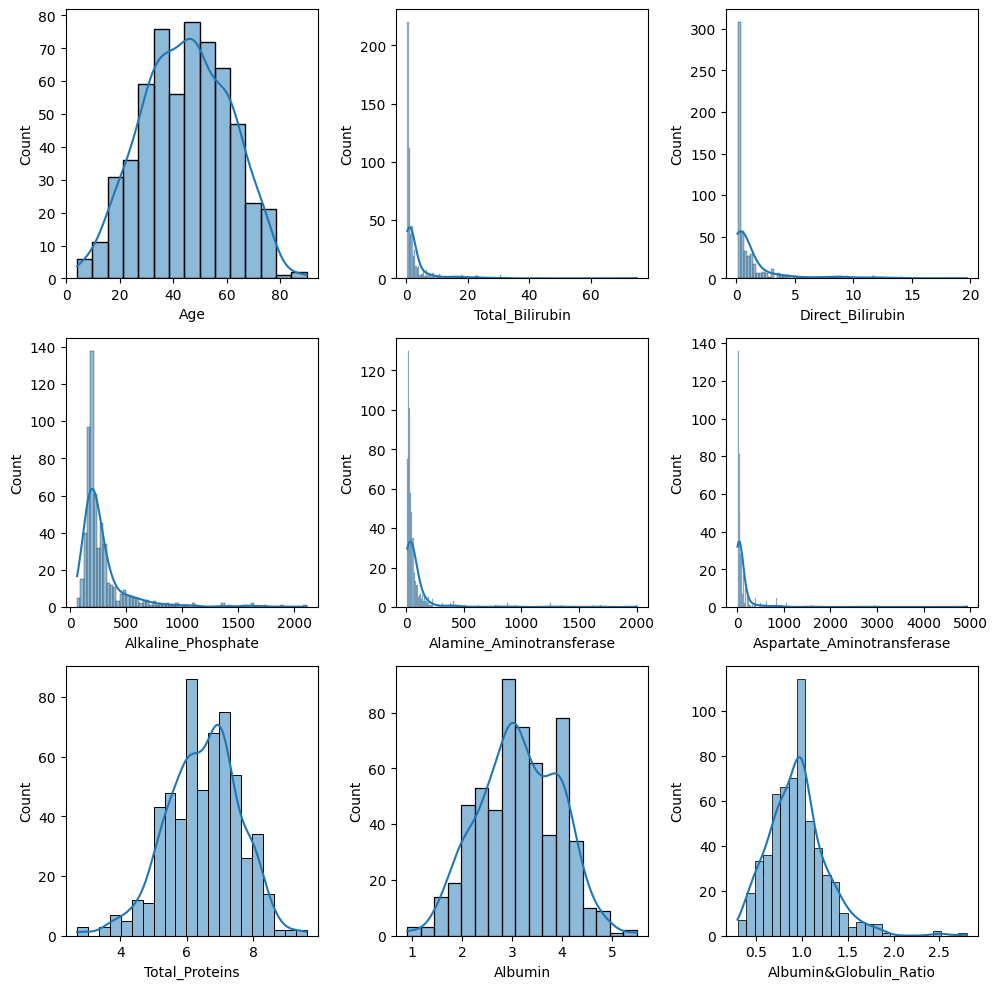

In [ ]:
plt.figure(figsize=(10,10))
n = 1
for i in data.drop(['Gender','Target'],axis=1):
    plt.subplot(3,3,n)
    sns.histplot(x=i,data=data,kde=True)
    n += 1
plt.tight_layout()

# **3.5 Checking and Handling Outliers**

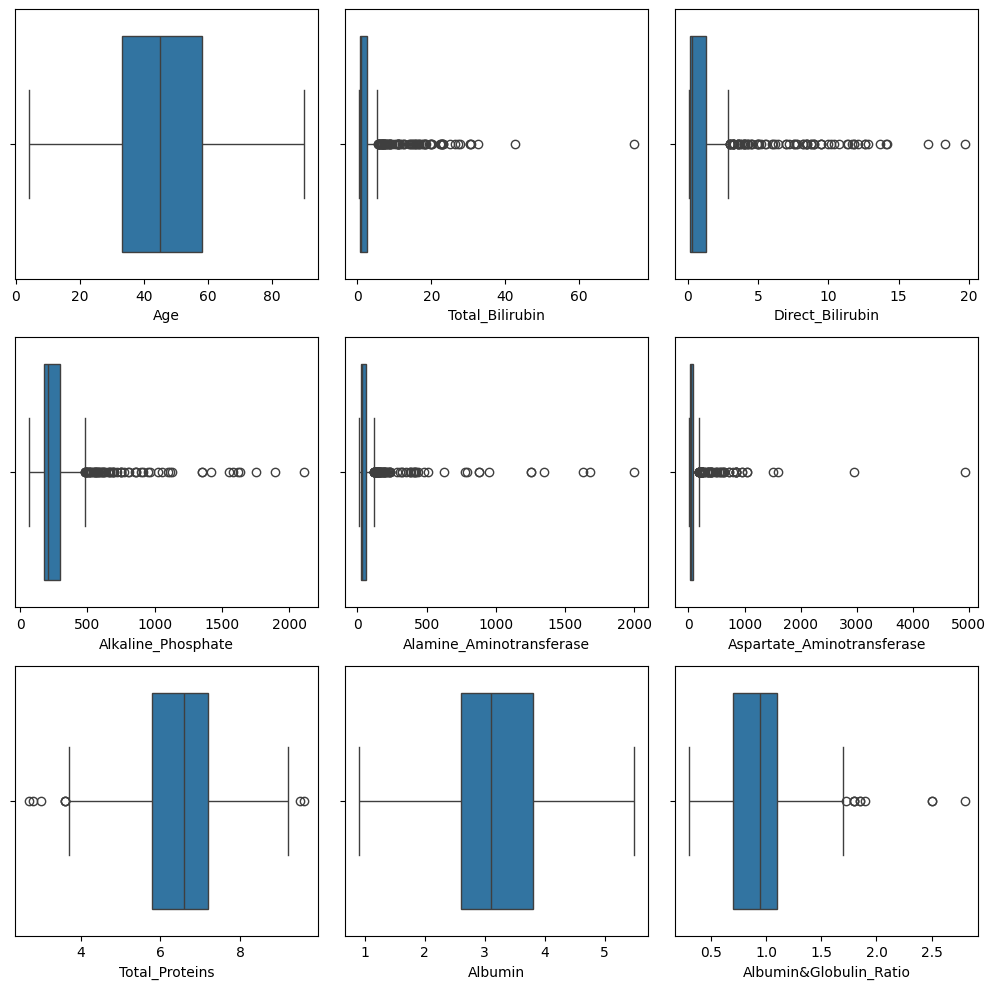

In [ ]:
plt.figure(figsize=(10,10))
n = 1
for i in data.drop(['Gender','Target'],axis=1):
    plt.subplot(3,3,n)
    sns.boxplot(x=i,data=data)
    n += 1
plt.tight_layout()

In [ ]:
data.loc[data.Total_Bilirubin > 30,'Total_Bilirubin'] = data.Total_Bilirubin.median()
data.loc[data.Direct_Bilirubin > 12,'Direct_Bilirubin'] = data.Direct_Bilirubin.median()
data.loc[data.Alkaline_Phosphate > 400,'Alkaline_Phosphate'] = data.Alkaline_Phosphate.median()
data.loc[data.Alamine_Aminotransferase > 100,'Alamine_Aminotransferase'] = data.Alamine_Aminotransferase.median()
data.loc[data.Aspartate_Aminotransferase > 100,'Aspartate_Aminotransferase'] = data.Aspartate_Aminotransferase.median()

# **3.6 Scaling & Transformation**

In [ ]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin&Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,208,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,208,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,208,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


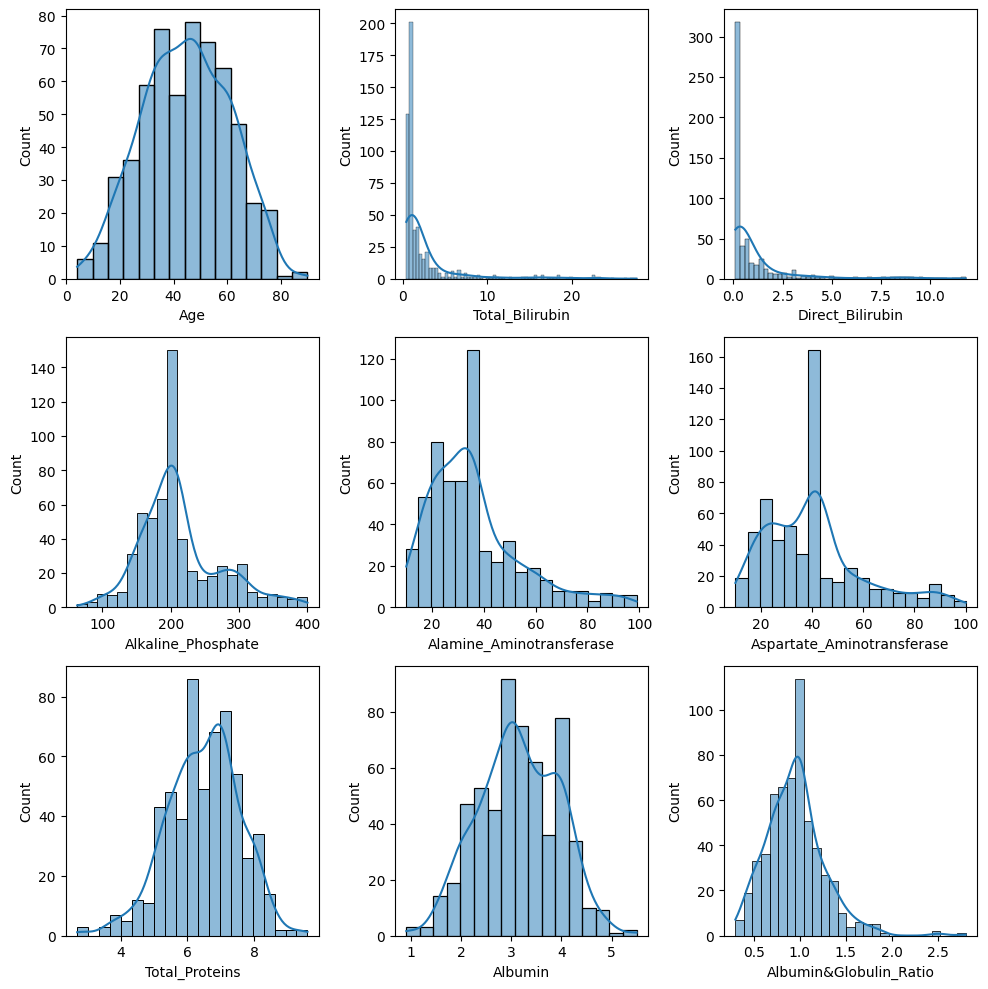

In [ ]:
# After handling outliers
plt.figure(figsize=(10,10))
n = 1
for i in data.drop(['Gender','Target'],axis=1):
    plt.subplot(3,3,n)
    sns.histplot(x=i,data=data,kde=True)
    n += 1
plt.tight_layout()

In [ ]:
data['Age'] = data['Age']/data['Age'].max()
data['Alkaline_Phosphate'] = data['Alkaline_Phosphate']/data['Alkaline_Phosphate'].max()
data['Alamine_Aminotransferase'] = data['Alamine_Aminotransferase']/data['Alamine_Aminotransferase'].max()
data['Aspartate_Aminotransferase'] = data['Aspartate_Aminotransferase']/data['Aspartate_Aminotransferase'].max()
oneenc = OneHotEncoder(drop='first',sparse=False,dtype=int)
data.Gender = oneenc.fit_transform(pd.DataFrame(data.Gender))
#stdenc = StandardScaler()
#stdenc = MinMaxScaler()
#cols = ['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphate','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Proteins','Albumin','Albumin&Globulin_Ratio']
#data[cols] = stdenc.fit_transform(pd.DataFrame(data[cols]))
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphate,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin&Globulin_Ratio,Target
0,0.722222,0,0.7,0.1,0.4675,0.161616,0.18,6.8,3.3,0.90,1
1,0.688889,1,10.9,5.5,0.5200,0.646465,1.00,7.5,3.2,0.74,1
2,0.688889,1,7.3,4.1,0.5200,0.606061,0.68,7.0,3.3,0.89,1
3,0.644444,1,1.0,0.4,0.4550,0.141414,0.20,6.8,3.4,1.00,1
4,0.800000,1,3.9,2.0,0.4875,0.272727,0.59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.666667,1,0.5,0.1,0.5200,0.202020,0.34,5.9,1.6,0.37,2
579,0.444444,1,0.6,0.1,0.2450,0.353535,0.31,6.0,3.2,1.10,1
580,0.577778,1,0.8,0.2,0.6125,0.484848,0.49,6.4,3.2,1.00,1
581,0.344444,1,1.3,0.5,0.4600,0.292929,0.32,6.8,3.4,1.00,1


# **3.7 Correllation**

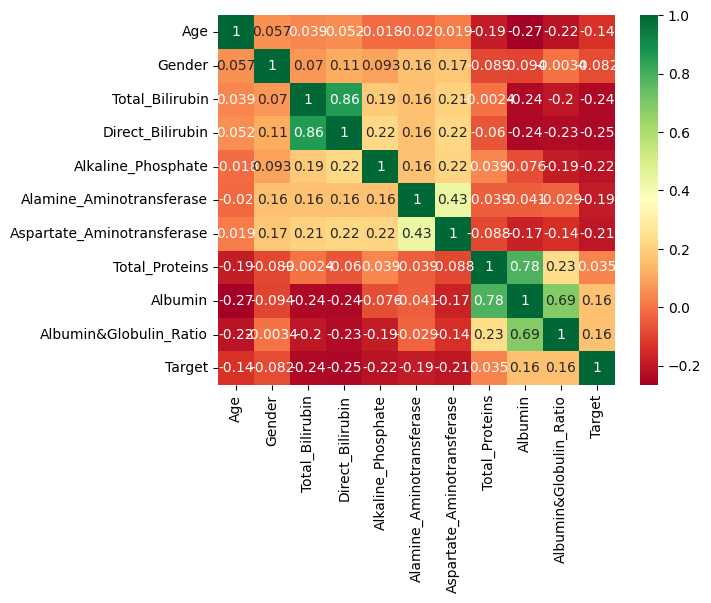

In [ ]:
corr = data.corr()
sns.heatmap(corr,cmap = 'RdYlGn',annot=True)
plt.show()

## Inference :
**1. Total_Bilirubin and Direct_Bilirubin:** The correlation coefficient is 0.86, indicating a strong positive relationship.

**2. Albumin and Total_Proteins:** The correlation coefficient is 0.78, these two features are also strongly positively correlated.


***Based on the results from correlation matrix,Total_Bilirubin and Direct_Bilirubin has correlation coefficient above 0.8. Hence Direct_Bilirubin is removed.***

In [ ]:
data.drop('Direct_Bilirubin',axis=1,inplace=True)

# **3.8 Spliting the data into Training & Testing**

In [ ]:
x = data.iloc[:,:-1]
y = data.Target
x,y

(          Age  Gender  Total_Bilirubin  Alkaline_Phosphate  \
 0    0.722222       0              0.7              0.4675   
 1    0.688889       1             10.9              0.5200   
 2    0.688889       1              7.3              0.5200   
 3    0.644444       1              1.0              0.4550   
 4    0.800000       1              3.9              0.4875   
 ..        ...     ...              ...                 ...   
 578  0.666667       1              0.5              0.5200   
 579  0.444444       1              0.6              0.2450   
 580  0.577778       1              0.8              0.6125   
 581  0.344444       1              1.3              0.4600   
 582  0.422222       1              1.0              0.5400   
 
      Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
 0                    0.161616                        0.18             6.8   
 1                    0.646465                        1.00             7.5   
 2      

# **4.Models**

# **4.1 Logistic Regression**

In [ ]:
# Logistic Model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report,accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)
LGModel = LogisticRegression()
LGModel.fit(x_train,y_train)
LGPred = LGModel.predict(x_test)
print('F1 score ->', f1_score(y_test,LGPred))
print('Acc score ->', accuracy_score(y_test,LGPred))
print('Classification Report ->', classification_report(y_test,LGPred))
pd.crosstab(y_test,LGPred)

F1 score -> 0.8421052631578947
Acc score -> 0.7435897435897436
Classification Report ->               precision    recall  f1-score   support

           1       0.75      0.95      0.84        84
           2       0.64      0.21      0.32        33

    accuracy                           0.74       117
   macro avg       0.70      0.58      0.58       117
weighted avg       0.72      0.74      0.69       117



col_0,1,2
Target,,
1,80,4
2,26,7


In [ ]:
# Comparing to see which random state gives best f1 score
# f1 = []
# rand = []
# for i in range(1,43):
#     x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
#     LGModel = LogisticRegression()
#     LGModel.fit(x_train,y_train)
#     LGPred = LGModel.predict(x_test)
#     f1.append(f1_score(y_test,LGPred))
#     rand.append(i)
# print(np.max(f1))
# print(rand[np.argmax(f1)])

In [ ]:
# With random state 39 it gives best f1 score of 88.88%
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,classification_report,accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=39)
LGModel = LogisticRegression()
LGModel.fit(x_train,y_train)
LGPred = LGModel.predict(x_test)
LG_f1 = f1_score(y_test,LGPred)
print('F1 score ->', f1_score(y_test,LGPred))
print('Acc score ->', accuracy_score(y_test,LGPred))
print('Classification Report ->', classification_report(y_test,LGPred))
pd.crosstab(y_test,LGPred)

F1 score -> 0.883248730964467
Acc score -> 0.8034188034188035
Classification Report ->               precision    recall  f1-score   support

           1       0.81      0.98      0.88        89
           2       0.78      0.25      0.38        28

    accuracy                           0.80       117
   macro avg       0.79      0.61      0.63       117
weighted avg       0.80      0.80      0.76       117



col_0,1,2
Target,,
1,87,2
2,21,7


# **4.2 Logistic Regression - Hyper Tuning**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=39)
LGModel = LogisticRegression(
    #class_weight= weights,
  # fit_intercept = True,
  #  penalty = 'l1',
   # random_state = 39,
   solver = 'saga'
)
LGModel.fit(x_train,y_train)
LGPred = LGModel.predict(x_test)
LG_HPT_f1 = f1_score(y_test,LGPred)
print('F1 score ->', f1_score(y_test,LGPred))
print('Acc score ->', accuracy_score(y_test,LGPred))
print('Classification Report ->', classification_report(y_test,LGPred))
pd.crosstab(y_test,LGPred)

F1 score -> 0.8699999999999999
Acc score -> 0.7777777777777778
Classification Report ->               precision    recall  f1-score   support

           1       0.78      0.98      0.87        89
           2       0.67      0.14      0.24        28

    accuracy                           0.78       117
   macro avg       0.73      0.56      0.55       117
weighted avg       0.76      0.78      0.72       117



col_0,1,2
Target,,
1,87,2
2,24,4


# **4.3 SVC**

In [ ]:
from sklearn.svm import SVC
SVCModel = SVC(class_weight= {1:1,2:1.6})
SVCModel.fit(x_train,y_train)
svcpred = SVCModel.predict(x_test)
print('F1 score ->', f1_score(y_test,svcpred))
print('Acc score ->', accuracy_score(y_test,svcpred))
print('Classification Report ->', classification_report(y_test,svcpred))
pd.crosstab(y_test,svcpred)

F1 score -> 0.8287292817679558
Acc score -> 0.7350427350427351
Classification Report ->               precision    recall  f1-score   support

           1       0.82      0.84      0.83        89
           2       0.44      0.39      0.42        28

    accuracy                           0.74       117
   macro avg       0.63      0.62      0.62       117
weighted avg       0.73      0.74      0.73       117



col_0,1,2
Target,,
1,75,14
2,17,11


In [ ]:
# Comparing to see which random state gives best f1 score
# f1 = []
# rand = []
# for i in range(1,43):
#     x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
#     SVCModel = SVC(C=8,
#               # kernel='rbf',
#              #  degree=15,
#             #  gamma = 'scale',
#               class_weight= {1:1,2:1.6},
#                random_state=21)
#     SVCModel.fit(x_train,y_train)
#     LGPred = SVCModel.predict(x_test)
#     f1.append(f1_score(y_test,LGPred))
#     rand.append(i)
# print(np.max(f1))
# print(rand[np.argmax(f1)])


In [ ]:
from sklearn.svm import SVC
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15)
SVCModel = SVC(class_weight= {1:1,2:1.6},random_state=21)
SVCModel.fit(x_train,y_train)
svcpred = SVCModel.predict(x_test)
SVC_f1 = f1_score(y_test,svcpred)
print('F1 score ->', f1_score(y_test,svcpred))
print('Acc score ->', accuracy_score(y_test,svcpred))
print('Classification Report ->', classification_report(y_test,svcpred))
pd.crosstab(y_test,svcpred)

F1 score -> 0.8571428571428572
Acc score -> 0.7606837606837606
Classification Report ->               precision    recall  f1-score   support

           1       0.78      0.95      0.86        88
           2       0.56      0.17      0.26        29

    accuracy                           0.76       117
   macro avg       0.67      0.56      0.56       117
weighted avg       0.72      0.76      0.71       117



col_0,1,2
Target,,
1,84,4
2,24,5


# **4.4 SVC - Hyper Tuning**

In [ ]:
# param_grid_linear_rbf = {
#     'C' : [1,5,10,50,60,70],
#     'kernel':['linear','rbf'],
#     'gamma': ['scale','auto']
# }
# param_grid_poly = {
#     'C' : [0.1,5,10,50,60,70],
#     'kernel':['poly'],
#     'gamma': ['scale','auto'],
#     'degree':[2,3,4,5]
# }
# dummy_model = SVC()

# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=18)
# grid = GridSearchCV(dummy_model,param_grid_poly,
#                    refit=True,
#                    verbose=3,
#                     scoring= 'accuracy',
#                     cv = 5
#                    )
# grid.fit(x_train,y_train)
# grid.best_params_

In [ ]:
# Best params for param_grid_linear_rbf is {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}
# Best params for param_grid_poly is {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
# Hyper tuning with param_grid_linear_rbf
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=18)
SVCModel = SVC(C=5,
             kernel='linear',
             gamma = 'scale',
              class_weight= {1:2,2:2.4}
             # random_state=10
              )
SVCModel.fit(x_train,y_train)
svcpred = SVCModel.predict(x_test)
SVC_HPT_f1 = f1_score(y_test,svcpred)
print('F1 score ->', f1_score(y_test,svcpred))
print('Acc score ->', accuracy_score(y_test,svcpred))
print('Classification Report ->', classification_report(y_test,svcpred))
pd.crosstab(y_test,svcpred)

F1 score -> 0.8749999999999999
Acc score -> 0.7948717948717948
Classification Report ->               precision    recall  f1-score   support

           1       0.83      0.92      0.87        91
           2       0.56      0.35      0.43        26

    accuracy                           0.79       117
   macro avg       0.70      0.63      0.65       117
weighted avg       0.77      0.79      0.78       117



col_0,1,2
Target,,
1,84,7
2,17,9


In [ ]:
# Hyper tuning with param_grid_poly is {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=18)
SVCModel = SVC(C=0.1,
             kernel='poly',
              degree=2,
              gamma = 'scale',
               class_weight= {1:1,2:1.8}
             # random_state=21
              )
SVCModel.fit(x_train,y_train)
svcpred = SVCModel.predict(x_test)
print('F1 score ->', f1_score(y_test,svcpred))
print('Acc score ->', accuracy_score(y_test,svcpred))
print('Classification Report ->', classification_report(y_test,svcpred))
pd.crosstab(y_test,svcpred)

F1 score -> 0.8640776699029125
Acc score -> 0.7606837606837606
Classification Report ->               precision    recall  f1-score   support

           1       0.77      0.98      0.86        91
           2       0.00      0.00      0.00        26

    accuracy                           0.76       117
   macro avg       0.39      0.49      0.43       117
weighted avg       0.60      0.76      0.67       117



col_0,1,2
Target,,
1,89,2
2,26,0


# **4.5 Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=18)
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
dtpred = dtmodel.predict(x_test)
#f1_dt = f1_score(y_test,dtpred)
print(f1_score(y_test,dtpred))
print(accuracy_score(y_test,dtpred))
print(classification_report(y_test,dtpred))
pd.crosstab(y_test,dtpred)

0.7657142857142858
0.6495726495726496
              precision    recall  f1-score   support

           1       0.80      0.74      0.77        91
           2       0.27      0.35      0.31        26

    accuracy                           0.65       117
   macro avg       0.54      0.54      0.54       117
weighted avg       0.68      0.65      0.66       117



col_0,1,2
Target,,
1,67,24
2,17,9


In [ ]:
# Comparing to see which random state gives best f1 score
# f1 = []
# randi = []
# randj = []
# for i in tqdm(range(1,43)):
#   for j in range(1,43):
#     x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
#     dtmodel = DecisionTreeClassifier(random_state=j)
#     dtmodel.fit(x_train,y_train)
#     dtpred = dtmodel.predict(x_test)
#     f1.append(f1_score(y_test,dtpred))
#     randi.append(i)
#     randj.append(j)
# print(np.max(f1))
# print(randi[np.argmax(f1)])
# print(randj[np.argmax(f1)])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)
dtmodel = DecisionTreeClassifier(random_state = 32)
dtmodel.fit(x_train,y_train)
dtpred = dtmodel.predict(x_test)
dt_f1 = f1_score(y_test,dtpred)
print(f1_score(y_test,dtpred))
print(accuracy_score(y_test,dtpred))
print(classification_report(y_test,dtpred))
pd.crosstab(y_test,dtpred)

0.8709677419354839
0.7948717948717948
              precision    recall  f1-score   support

           1       0.89      0.85      0.87        95
           2       0.46      0.55      0.50        22

    accuracy                           0.79       117
   macro avg       0.68      0.70      0.69       117
weighted avg       0.81      0.79      0.80       117



col_0,1,2
Target,,
1,81,14
2,10,12


# **4.6 Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcmodel = RandomForestClassifier()
rfcmodel.fit(x_train,y_train)
rfcpred = rfcmodel.predict(x_test)
#rfc_f1 = f1_score(y_test,rfcpred)
print(f1_score(y_test,rfcpred))
print(accuracy_score(y_test,rfcpred))
print(classification_report(y_test,rfcpred))
pd.crosstab(y_test,rfcpred)

0.8387096774193549
0.7435897435897436
              precision    recall  f1-score   support

           1       0.86      0.82      0.84        95
           2       0.35      0.41      0.38        22

    accuracy                           0.74       117
   macro avg       0.60      0.62      0.61       117
weighted avg       0.76      0.74      0.75       117



col_0,1,2
Target,,
1,78,17
2,13,9


In [ ]:
# Comparing to see which random state gives best f1 score
# Runs approximately 12 mins
# f1 = []
# randi = []
# randj = []
# for i in tqdm(range(1,43)):
#     for j in range(1,43):
#         x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
#         rfcmodel = RandomForestClassifier(random_state=j)
#         rfcmodel.fit(x_train,y_train)
#         rfcpred = rfcmodel.predict(x_test)
#         f1.append(f1_score(y_test,rfcpred))
#         randi.append(i)
#         randj.append(j)
# print(np.max(f1))
# print(randi[np.argmax(f1)])
# print(randj[np.argmax(f1)])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=39)
rfcmodel = RandomForestClassifier(random_state=9)
rfcmodel.fit(x_train,y_train)
rfcpred = rfcmodel.predict(x_test)
rfc_f1 = f1_score(y_test,rfcpred)
print(f1_score(y_test,rfcpred))
print(accuracy_score(y_test,rfcpred))
print(classification_report(y_test,rfcpred))
pd.crosstab(y_test,rfcpred)

0.8681318681318682
0.7948717948717948
              precision    recall  f1-score   support

           1       0.85      0.89      0.87        89
           2       0.58      0.50      0.54        28

    accuracy                           0.79       117
   macro avg       0.72      0.69      0.70       117
weighted avg       0.79      0.79      0.79       117



col_0,1,2
Target,,
1,79,10
2,14,14


# **4.7 Random Forest Classifier - Hyper Tuning**

In [ ]:
# Runs for 16 mins
# n_estimators = [int(x) for x in np.linspace(200,2000,5)]
# max_features = ['sqrt','log2']  # auto value is depricated
# max_depth = [int(x) for x in np.linspace(10,110,num=5)]
# min_samples_split = [3,5]
# min_samples_leaf = [4,6,8,10]

# rfparams = {
#         'n_estimators': n_estimators,
#         'max_features' : max_features,
#         'max_depth' : max_depth,
#         'min_samples_split' : min_samples_split,
#         'min_samples_leaf' : min_samples_leaf
# }
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=39)
# rfcmodel = RandomForestClassifier(random_state=9)
# rfcgrid = GridSearchCV(rfcmodel,rfparams,scoring='f1',cv=5,verbose=3,n_jobs=-1)
# rfcgrid.fit(x_train,y_train)

In [ ]:
# rfcgrid.best_params_
# {'max_depth': 10,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 8,
#  'min_samples_split': 3,
#  'n_estimators': 200}

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=39)
rfcmodel = RandomForestClassifier(random_state=20,
                                 n_estimators = 200,
                                 max_features = 'sqrt',
                                 max_depth = 10,
                                 min_samples_split = 4,
                                 min_samples_leaf = 8,
                                class_weight = {1.0:2.3,2.0:1.5}
                                 )
rfcmodel.fit(x_train,y_train)
rfcpred = rfcmodel.predict(x_test)
rfc_hpt_f1 = f1_score(y_test,rfcpred)
print(f1_score(y_test,rfcpred))
print(accuracy_score(y_test,rfcpred))
print(classification_report(y_test,rfcpred))
pd.crosstab(y_test,rfcpred)

0.8613861386138614
0.7606837606837606
              precision    recall  f1-score   support

           1       0.77      0.98      0.86        89
           2       0.50      0.07      0.12        28

    accuracy                           0.76       117
   macro avg       0.63      0.52      0.49       117
weighted avg       0.71      0.76      0.69       117



col_0,1,2
Target,,
1,87,2
2,26,2


# **4.8 GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcmodel = GradientBoostingClassifier(random_state=42)
gbcmodel.fit(x_train,y_train)
gbcpred = gbcmodel.predict(x_test)
#gbc_f1 = f1_score(y_test,gbcpred)
print(f1_score(y_test,gbcpred))
print(accuracy_score(y_test,gbcpred))
print(classification_report(y_test,gbcpred))
pd.crosstab(y_test,gbcpred)

0.8361581920903954
0.7521367521367521
              precision    recall  f1-score   support

           1       0.84      0.83      0.84        89
           2       0.48      0.50      0.49        28

    accuracy                           0.75       117
   macro avg       0.66      0.67      0.66       117
weighted avg       0.76      0.75      0.75       117



col_0,1,2
Target,,
1,74,15
2,14,14


In [ ]:
# Comparing to see which random state gives best f1 score
# Runs approximately 9 mins
# f1 = []
# randi = []
# randj = []
# for i in tqdm(range(1,43)):
#     for j in range(1,43):
#         x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
#         gbcmodel = GradientBoostingClassifier(random_state=42)
#         gbcmodel.fit(x_train,y_train)
#         gbcpred = gbcmodel.predict(x_test)
#         f1.append(f1_score(y_test,gbcpred))
#         randi.append(i)
#         randj.append(j)
# print(np.max(f1))
# print(randi[np.argmax(f1)])
# print(randj[np.argmax(f1)])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 25)
gbcmodel = GradientBoostingClassifier(random_state=1)
gbcmodel.fit(x_train,y_train)
gbcpred = gbcmodel.predict(x_test)
gbc_f1 = f1_score(y_test,gbcpred)
print(f1_score(y_test,gbcpred))
print(accuracy_score(y_test,gbcpred))
print(classification_report(y_test,gbcpred))
pd.crosstab(y_test,gbcpred)

0.823529411764706
0.717948717948718
              precision    recall  f1-score   support

           1       0.78      0.88      0.82        88
           2       0.39      0.24      0.30        29

    accuracy                           0.72       117
   macro avg       0.58      0.56      0.56       117
weighted avg       0.68      0.72      0.69       117



col_0,1,2
Target,,
1,77,11
2,22,7


# **4.9 Gradient Boosting Classifier - Hyper Tuning**

In [ ]:
# Approximately runs for 40 mins
# For smaller datasets use lesser values
# param_grid = {
#     'learning_rate' :[0.01,0.03,0.06,0.1,0.4],
#     'max_depth' : [5,6,7,8],
#     'n_estimators' : [50,65,80],
#     'random_state' : [i for i in range(1,43)]
# }
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
# GBCModel = GradientBoostingClassifier(random_state =1)
# gbcgrid = GridSearchCV(estimator=GBCModel,
#                   scoring='f1',
#                   refit=True,
#                   param_grid = param_grid,
#                   cv =5,
#                   verbose=3,
#                   n_jobs=-1)
# gbcgrid.fit(x_train,y_train)

In [ ]:
#gbcgrid.best_params_
#{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'random_state': 1}

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
gbcmodel = GradientBoostingClassifier(random_state= 1,
                                     learning_rate = 0.01,
                                     max_depth = 5,
                                     n_estimators = 100
                                     )
gbcmodel.fit(x_train,y_train)
gbcpred = gbcmodel.predict(x_test)
gbc_hpt_f1 = f1_score(y_test,gbcpred)
print(f1_score(y_test,gbcpred))
print(accuracy_score(y_test,gbcpred))
print(classification_report(y_test,gbcpred))
pd.crosstab(y_test,gbcpred)

0.8163265306122449
0.6923076923076923
              precision    recall  f1-score   support

           1       0.74      0.91      0.82        88
           2       0.11      0.03      0.05        29

    accuracy                           0.69       117
   macro avg       0.43      0.47      0.43       117
weighted avg       0.58      0.69      0.63       117



col_0,1,2
Target,,
1,80,8
2,28,1


# **4.10 XGBoost**

In [ ]:
from xgboost import XGBClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=18)
y_train = y_train.replace({1:0,2:1})
y_test = y_test.replace({1:0,2:1})
XGBModel = XGBClassifier()
XGBModel.fit(x_train,y_train)
xgbpred = XGBModel.predict(x_test)
#f1_xgb = f1_score(y_test,xgbpred)
print(f1_score(y_test,xgbpred))
print(accuracy_score(y_test,xgbpred))
print(classification_report(y_test,xgbpred))
pd.crosstab(y_test,xgbpred)

0.35999999999999993
0.7264957264957265
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        91
           1       0.38      0.35      0.36        26

    accuracy                           0.73       117
   macro avg       0.60      0.59      0.59       117
weighted avg       0.72      0.73      0.72       117



col_0,0,1
Target,,
0,76,15
1,17,9


In [ ]:
# Comparing to see which random state gives best f1 score
# f1 = []
# randi = []
# randj = []
# for i in tqdm(range(1,33)):
#     for j in range(1,25):
#         x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
#         y_train = y_train.replace({1:0,2:1})
#         y_test = y_test.replace({1:0,2:1})
#         XGBModel = XGBClassifier(random_state = j)
#         XGBModel.fit(x_train,y_train)
#         xgbpred = XGBModel.predict(x_test)
#         f1.append(f1_score(y_test,xgbpred))
#         randi.append(i)
#         randj.append(j)
# print(np.max(f1))
# print(randi[np.argmax(f1)])
# print(randj[np.argmax(f1)])

In [ ]:
from xgboost import XGBClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
y_train = y_train.replace({1:0,2:1})
y_test = y_test.replace({1:0,2:1})
XGBModel = XGBClassifier(random_state = 1)
XGBModel.fit(x_train,y_train)
xgbpred = XGBModel.predict(x_test)
#f1_xgb = f1_score(y_test,xgbpred)
print(f1_score(y_test,xgbpred))
print(accuracy_score(y_test,xgbpred))
print(classification_report(y_test,xgbpred))
pd.crosstab(y_test,xgbpred)

0.5217391304347826
0.717948717948718
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        83
           1       0.51      0.53      0.52        34

    accuracy                           0.72       117
   macro avg       0.66      0.66      0.66       117
weighted avg       0.72      0.72      0.72       117



col_0,0,1
Target,,
0,66,17
1,16,18


# XGBoost - Hyper Tuning

In [ ]:
# from xgboost import XGBClassifier
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
# y_train = y_train.replace({1:0,2:1})
# y_test = y_test.replace({1:0,2:1})
# param_grid = {'subsample' : [0.5,0.8,1.0],
#     'learning_rate' :[0.01,0.03,0.06,0.1,0.5],
#     'max_depth' : [5,8,10],
#     'n_estimators' : [100,200,250,300],
#     'random_state' : [i for i in range(1,30)]
# }
# XGBmodel = XGBClassifier()
# xgbcv = GridSearchCV(estimator = XGBmodel,
#                 param_grid = param_grid,
#                   cv =3,
#                   verbose=5,
#                   scoring='f1',
#                   n_jobs=-1
# )
# xgbcv.fit(x_train,y_train)



In [ ]:
# xgbcv.best_params_

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
y_train = y_train.replace({1:0,2:1})
y_test = y_test.replace({1:0,2:1})
XGBModel = XGBClassifier(random_state = 1,
                       learning_rate = 0.01,
                       max_depth = 5,
                       n_estimators = 100
                      # subsample = 0.5
                      # gamma=1,
                      # class_weights = {0:1,1:2.5}
                        )
XGBModel.fit(x_train,y_train)
xgbpred = XGBModel.predict(x_test)
#f1_xgb = f1_score(y_test,xgbpred)
print(f1_score(y_test,xgbpred))
print(accuracy_score(y_test,xgbpred))
print(classification_report(y_test,xgbpred))
pd.crosstab(y_test,xgbpred)

0.09523809523809523
0.6752136752136753
              precision    recall  f1-score   support

           0       0.71      0.93      0.80        83
           1       0.25      0.06      0.10        34

    accuracy                           0.68       117
   macro avg       0.48      0.49      0.45       117
weighted avg       0.57      0.68      0.60       117



col_0,0,1
Target,,
0,77,6
1,32,2


# **4.11 ANN**

In [ ]:
from sklearn.neural_network import MLPClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=18)
ANNmodel = MLPClassifier()
ANNmodel.fit(x_train,y_train)
pred = ANNmodel.predict(x_test)
print('F1 Score -> ', f1_score(y_test,pred))
print('Acc Score -> ',accuracy_score(y_test,pred))
print('Classification report ->', classification_report(y_test,pred))
pd.crosstab(y_test,pred)

F1 Score ->  0.8877551020408164
Acc Score ->  0.811965811965812
Classification report ->               precision    recall  f1-score   support

           1       0.83      0.96      0.89        91
           2       0.67      0.31      0.42        26

    accuracy                           0.81       117
   macro avg       0.75      0.63      0.65       117
weighted avg       0.79      0.81      0.78       117



col_0,1,2
Target,,
1,87,4
2,18,8


In [ ]:
# Comparing to see which random state gives best f1 score
# It runs approximatley 50 mins for rs - 43
# f1 = []
# randi = []
# randj = []
# for i in tqdm(range(1,43)):
#     for j in range(1,43):
#         x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
#         ANNmodel = MLPClassifier(learning_rate_init = 0.005,
#                         hidden_layer_sizes = (100,50,3)
#                          )
#         ANNmodel.fit(x_train,y_train)
#         ANNpred = ANNmodel.predict(x_test)
#         f1.append(f1_score(y_test,ANNpred))
#         randi.append(i)
#         randj.append(j)
# print(np.max(f1))
# print(randi[np.argmax(f1)])
# print(randj[np.argmax(f1)])

In [ ]:
# i = 32 & j = 16

In [ ]:
from sklearn.neural_network import MLPClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)
ANNmodel = MLPClassifier(random_state=16,
                        # learning_rate_init = 0.001,
                       # hidden_layer_sizes = (100,50,3)
                        )
ANNmodel.fit(x_train,y_train)
pred = ANNmodel.predict(x_test)
ANN_f1 = f1_score(y_test,pred)
print('F1 Score -> ', f1_score(y_test,pred))
print('Acc Score -> ',accuracy_score(y_test,pred))
print('Classification report ->', classification_report(y_test,pred))
pd.crosstab(y_test,pred)

F1 Score ->  0.8453608247422681
Acc Score ->  0.7435897435897436
Classification report ->               precision    recall  f1-score   support

           1       0.83      0.86      0.85        95
           2       0.28      0.23      0.25        22

    accuracy                           0.74       117
   macro avg       0.55      0.55      0.55       117
weighted avg       0.72      0.74      0.73       117



col_0,1,2
Target,,
1,82,13
2,17,5


# **4.12 ANN - Hyper Tuning**

In [ ]:
# Runs approximately for 10 hours
# params = {
#     "learning_rate_init" : [ 0.001,0.005,0.01],
#     "hidden_layer_sizes" : [(100,50,3),(100,100,3)],
#     "random_state" : [i for i in range(1,43)],
#     "activation" : ['identity', 'logistic', 'tanh', 'relu'],
#     "solver" : ['lbfgs', 'sgd', 'adam'],
# }
# MLPmodel = MLPClassifier()
# from sklearn.model_selection import GridSearchCV
# gridmodel = GridSearchCV(estimator=MLPmodel,param_grid=params,scoring='f1',
#                       #  n_jobs = -1,
#                         verbose = 3,
#                         cv = 5)
# gridmodel.fit(x_train,y_train)

In [ ]:
# gridmodel.best_params_
# {'activation': 'identity',
#  'hidden_layer_sizes': (100, 50, 3),
#  'learning_rate_init': 0.01,
#  'random_state': 37,
#  'solver': 'adam'}

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)
ANNmodel = MLPClassifier(hidden_layer_sizes = (100,50,3),
                         activation='identity',
                         solver='adam',
                         learning_rate_init = 0.005, # changed the value to see accuracy improves at 0.005
                         max_iter=350,
                         random_state=12
                       )
ANNmodel.fit(x_train,y_train)
pred = ANNmodel.predict(x_test)
ANN_HPT_f1 = f1_score(y_test,pred)
print('F1 Score -> ', f1_score(y_test,pred))
print('Acc Score -> ',accuracy_score(y_test,pred))
print('Classification report ->', classification_report(y_test,pred))
pd.crosstab(y_test,pred)

F1 Score ->  0.9082125603864734
Acc Score ->  0.8376068376068376
Classification report ->               precision    recall  f1-score   support

           1       0.84      0.99      0.91        95
           2       0.80      0.18      0.30        22

    accuracy                           0.84       117
   macro avg       0.82      0.59      0.60       117
weighted avg       0.83      0.84      0.79       117



col_0,1,2
Target,,
1,94,1
2,18,4


# **5. Results**

## **5.1 Visualization of F1 scores**


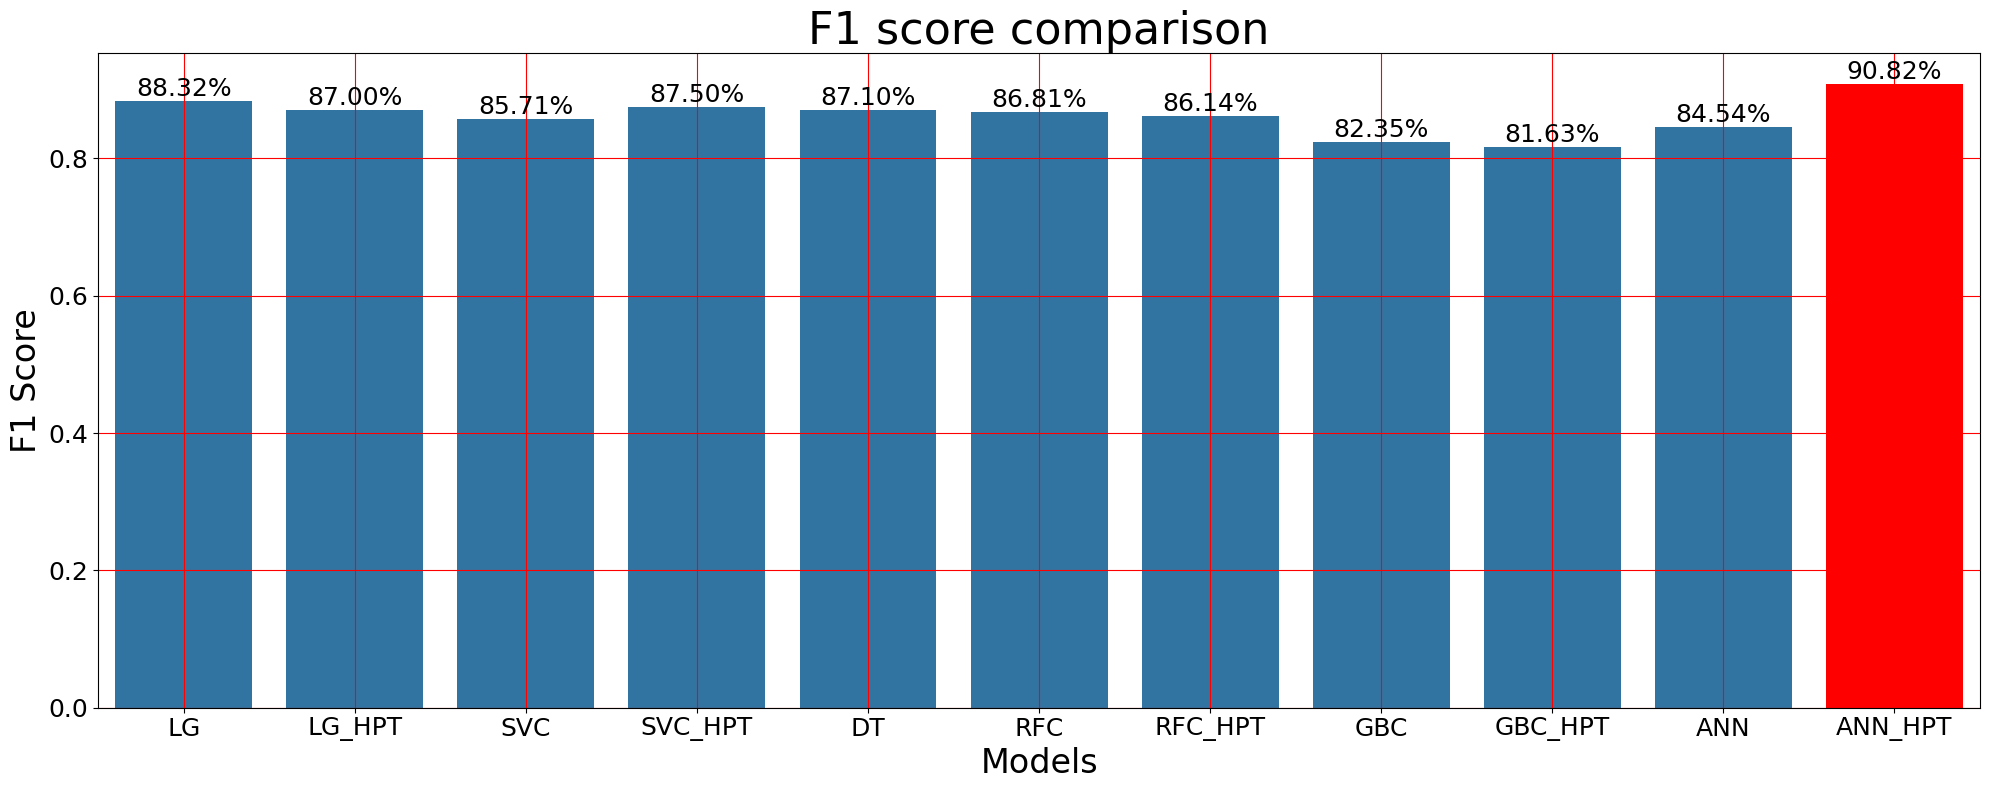

In [ ]:
plt.figure(figsize=(20,8))
data = {'model' : ['LG','LG_HPT','SVC','SVC_HPT','DT','RFC','RFC_HPT','GBC','GBC_HPT','ANN','ANN_HPT'],
           'values' : [LG_f1,LG_HPT_f1,SVC_f1,SVC_HPT_f1,dt_f1,rfc_f1,rfc_hpt_f1,gbc_f1,gbc_hpt_f1,ANN_f1,ANN_HPT_f1]}
df = pd.DataFrame(data)

df['Percentage'] = (df['values']) * 100

ax = sns.barplot(x = 'model',y = 'values', data=df)
# Add labels to the bars
for container in ax.containers:
    labels = [f'{v:.2f}%' for v in df['Percentage']]
    ax.bar_label(container,labels = labels,fontsize = 18)

# Highlight the bar with the maximum value
max_value = df['values'].max()
max_index = df['values'].idxmax()
ax.patches[max_index].set_facecolor('red')

plt.grid(color='r')
plt.title('F1 score comparison',fontsize = 32)
plt.xlabel('Models',fontsize = 24)
plt.ylabel('F1 Score',fontsize = 24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

# **6. Conclusion**

- **Summary**: ANN outperformed other models with an accuracy of 90.82%.

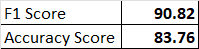

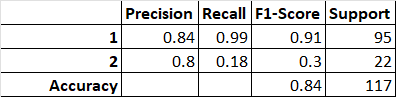